# Chapter 8 - Foundational Probability Concepts and Their Applications

## 8.1 Randomness, Probability and Random Variables

### 8.1.4 Introduction to simulations with Numpy 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# line to allow the plots to be showed in the Jupyter notebook
%matplotlib inline

In [2]:
def toss_die():
    outcome = np.random.randint(1, 7)
    return outcome

In [3]:
for x in range(10):
    print(toss_die(), end=', ')

3, 3, 1, 5, 2, 2, 1, 5, 6, 4, 

In [4]:
np.random.seed(123)
for x in range(10):
    print(toss_die(), end=', ')

6, 3, 5, 3, 2, 4, 3, 4, 2, 2, 

In [5]:
students = ['student_' + str(i) for i in range(1,31)]

In [6]:
sample_students = np.random.choice(
            a=students,
            size=4,
            replace=False)
sample_students

array(['student_9', 'student_27', 'student_23', 'student_14'],
      dtype='<U10')

In [7]:
sample_students2 = np.random.choice(
            a=students,
            size=12,
            replace=True)

for i,s in enumerate(sample_students2):
    print(f'Week {i+1}: {s}')

Week 1: student_29
Week 2: student_29
Week 3: student_21
Week 4: student_7
Week 5: student_2
Week 6: student_22
Week 7: student_23
Week 8: student_28
Week 9: student_3
Week 10: student_2
Week 11: student_13
Week 12: student_9


### 8.1.5 Probability as a relative frequency 

In [8]:
np.random.seed(81)

one_million_tosses = np.random.randint(low=1,
                                       high=7,
                                       size=int(1e6))

In [9]:
one_million_tosses[:10]

array([4, 2, 1, 4, 4, 4, 2, 2, 6, 3])

In [10]:
N_A_occurs = (one_million_tosses == 2).sum()

Prob_A = N_A_occurs/one_million_tosses.shape[0]

print(f'P(A)={Prob_A}')

P(A)=0.16595


In [11]:
N_B_occurs = (one_million_tosses == 6).sum()

Prob_B = N_B_occurs/one_million_tosses.shape[0]

print(f'P(B)={Prob_B}')

P(B)=0.166809


In [12]:
N_odd_number = (
    (one_million_tosses == 1) | 
    (one_million_tosses == 3) | 
    (one_million_tosses == 5)).sum()

Prob_C = N_odd_number/one_million_tosses.shape[0]

print(f'P(C)={Prob_C}')

P(C)=0.501162


In [13]:
N_D_occurs = (one_million_tosses < 5).sum()

Prob_D = N_D_occurs/one_million_tosses.shape[0]

print(f'P(D)={Prob_D}')

P(D)=0.666004


### 8.1.7 Defining random variables

In [14]:
np.random.seed(55)

number_of_tosses = int(1e5)

die_1 = np.random.randint(1,7, size=number_of_tosses)
die_2 = np.random.randint(1,7, size=number_of_tosses)

X = die_1 + die_2

In [15]:
print(die_1[:10])
print(die_2[:10])
print(X[:10])

[6 3 1 6 6 6 6 6 4 2]
[1 2 3 5 1 3 3 6 3 1]
[ 7  5  4 11  7  9  9 12  7  3]


In [16]:
Prob_X_is_10 = (X == 10).sum()/X.shape[0]

print(f'P(X = 10) = {Prob_X_is_10}')

P(X = 10) = 0.08329


In [17]:
Prob_X_is_gt_5 = (X > 5).sum()/X.shape[0]

print(f'P(X > 5) = {Prob_X_is_gt_5}')

P(X > 5) = 0.72197


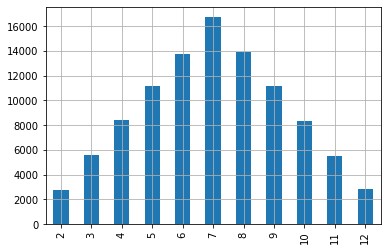

In [18]:
X = pd.Series(X)

# counts the occurrences of each value
freq_of_X_values = X.value_counts()

freq_of_X_values.sort_index().plot(kind='bar')
plt.grid();

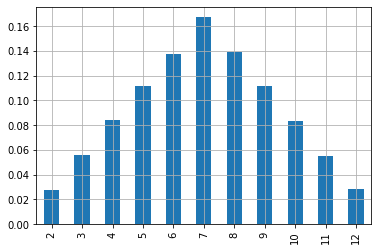

In [19]:
Prob_of_X_values = freq_of_X_values/X.shape[0]

Prob_of_X_values.sort_index().plot(kind='bar')
plt.grid();

In [20]:
np.random.seed(97)
ten_coins_a_million_times = np.random.randint(0, 2, size=int(10e6)).reshape(-1,10)

In [21]:
ten_coins_a_million_times[:12, :]

array([[0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 0, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 1]])

In [22]:
Y = ten_coins_a_million_times.sum(axis=1)

In [23]:
Prob_Y_is_0 = (Y == 0).sum() / Y.shape[0]

print((Y == 0).sum())

print(f'P(Y = 0) = {Prob_Y_is_0}')

986
P(Y = 0) = 0.000986


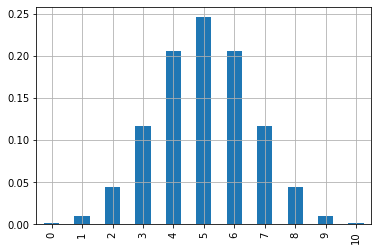

In [24]:
Y = pd.Series(Y)

# counts the occurrences of each value
freq_of_Y_values = Y.value_counts()

Prob_of_Y_values = freq_of_Y_values/Y.shape[0]

Prob_of_Y_values.sort_index().plot(kind='bar')
plt.grid();

In [25]:
print(Prob_of_Y_values.loc[[4,5,6]])

print(f'P(4<=Y<=6) = {Prob_of_Y_values.loc[[4,5,6]].sum()}')

4    0.205283
5    0.246114
6    0.205761
dtype: float64
P(4<=Y<=6) = 0.657158


### 8.1.7 Exercise: calculate average wins in the roulette 

## 8.2 Discrete Random Variables

### 8.2.2 Defining discrete random variables

In [26]:
np.random.seed(977)

np.random.choice(
    ['defective', 'good'],
    size=12,
    p=(0.04, 0.96)
)

array(['good', 'good', 'good', 'good', 'good', 'good', 'good',
       'defective', 'good', 'good', 'good', 'good'], dtype='<U9')

In [27]:
np.random.seed(10)

n_boxes = int(1e6)
parts_per_box = 12

one_million_boxes = np.random.choice(
                [1, 0],
                size=(n_boxes, parts_per_box),
                p=(0.04, 0.96)
)

In [28]:
one_million_boxes[:5,:]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [29]:
# count defective pieces per box
defective_pieces_per_box = one_million_boxes.sum(axis=1)

# count how many times we observed 0, 1, …, 12 defective pieces
defective_pieces_per_box = pd.Series(defective_pieces_per_box)
frequencies = defective_pieces_per_box.value_counts()

# probability distribution
probs_Z = frequencies/n_boxes

0    0.612402
1    0.306383
2    0.070584
3    0.009630
4    0.000940
5    0.000056
6    0.000004
7    0.000001
dtype: float64


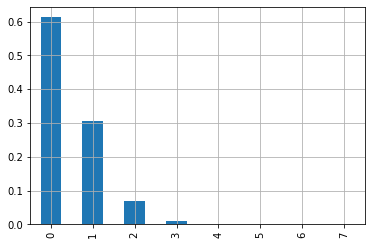

In [30]:
print(probs_Z.sort_index())
probs_Z.sort_index().plot(kind='bar')
plt.grid()

### 8.2.3 The Binomial distribution

In [31]:
import scipy.stats as stats

In [32]:
Y_rv = stats.binom(
    n=10, # number of coins
    p=0.5 # probability of heads (success)
)

In [33]:
y_values = np.arange(0,11)

In [34]:
Y_probs = Y_rv.pmf(y_values)

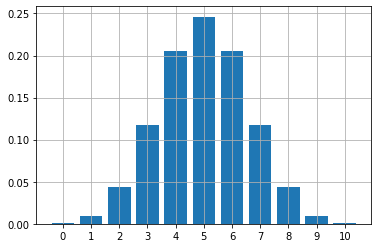

In [35]:
fig, ax = plt.subplots()

ax.bar(y_values, Y_probs)

ax.set_xticks(y_values)

ax.grid()

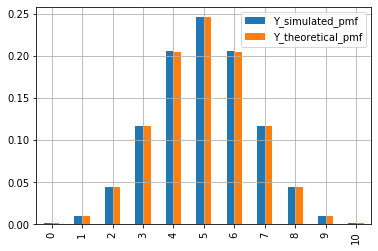

In [36]:
Y_rv_df = pd.DataFrame(
    {
        'Y_simulated_pmf': Prob_of_Y_values,
        'Y_theoretical_pmf':  Y_probs
    },
    index=y_values)

Y_rv_df.plot(kind='bar')
plt.grid();

In [ ]:
stats.binom.pmf(k=1, n=12, p=0.04)

## 8.3 Continuous Random Variables

### 8.3.2 Defining continuous random variables

In [37]:
games = pd.read_csv('./data/appstore_games.csv')

original_colums_dict = {x: x.lower().replace(' ','_') for x in games.columns}

games.rename(
    columns = original_colums_dict,
    inplace = True
)

In [ ]:
games['size'] = games['size']/(1e6)

# replacing the one missing value with the median
games['size'] = games['size'].fillna(games['size'].median())

games['size'].hist(bins = 50, ec='k');

In [ ]:
# get the number of games to use as denominator
number_of_games = games['size'].size

# calculate probabilities
prob_X_gt_100 = (games['size'] > 100).sum()/number_of_games

prob_X_bt_100_and_400 = ((games['size'] >= 100) & (games['size'] <= 400)).sum()/number_of_games

prob_X_eq_152_53 = (games['size'] == 152.53).sum()/number_of_games

# print the results
print(f'P(X > 100) = {prob_X_gt_100:0.5f}')
print(f'P(100 <= X <= 400) = {prob_X_bt_100_and_400:0.5f}')
print(f'P(X = 152.53) = {prob_X_eq_152_53:0.5f}')

### 8.3.3 The Normal distribution

In [ ]:
# set the mu and sigma parameters of the distribution
heights_mean = 170
heights_sd = 10

# instantiate the random variable object
heights_rv = stats.norm(
        loc = heights_mean, # mean of the distribution
        scale = heights_sd  # standard deviation
)

In [ ]:
heights_rv.pdf(175)

In [ ]:
values = np.linspace(130, 210, num=200)

In [ ]:
heights_rv_pdf = heights_rv.pdf(values)

plt.plot(values, heights_rv_pdf)
plt.grid();

In [ ]:
sample_heights = heights_rv.rvs(
    size = 5,
    random_state = 998 # similar to np.seed
)

for i, h in enumerate(sample_heights):
    print(f'Men {i + 1} height: {h:0.1f}')

In [ ]:
# size of the simulation
sim_size = int(1e5)

# simulate the random samples
sample_heighs = heights_rv.rvs(
    size = sim_size,
    random_state = 88 # similar to np.seed
)

Prob_event = (sample_heighs > 190).sum()/sim_size

print(f'Probability of a male > 190 cm : {Prob_event:0.5f} (or {100*Prob_event:0.2f}%)')

### 8.3.4 Some properties of the Normal distribution

In [ ]:
# parameters of distributions
heights_means = [170, 170, 175]
heights_sds = [10, 5, 10]
countries = ['Country A', 'Country B', 'Country C']

heights_rvs = {}
plotting_values = {}

# creating the random variables
for i, country in enumerate(countries):
    heights_rvs[country] = stats.norm(
        loc = heights_means[i], # mean of the distribution
        scale = heights_sds[i]  # standard deviation
    )

# getting x and y values for plotting the distributions
for i, country in enumerate(countries):
    x_values = np.linspace(heights_means[i] - 4*heights_sds[i], heights_means[i] + 4*heights_sds[i])
    y_values = heights_rvs[country].pdf(x_values)
    plotting_values[country] = (x_values, y_values)
    

# plotting the three distributions
fig, ax = plt.subplots(figsize = (8, 4))
for i, country in enumerate(countries):
    ax.plot(
        plotting_values[country][0],
        plotting_values[country][1], 
        label=country,
        lw = 2
    )
    
ax.set_xticks(np.arange(130, 220, 5))
plt.legend()
plt.grid();    

In [ ]:
from matplotlib.patches import Polygon

def func(x):
    return heights_rv.pdf(x)


lower_lim = 160
upper_lim = 180

x = np.linspace(130, 210)
y = func(x)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y, 'blue', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(lower_lim, upper_lim)
iy = func(ix)
verts = [(lower_lim, 0), *zip(ix, iy), (upper_lim, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.text(0.5 * (lower_lim + upper_lim), 0.01, r"$\int_{160}^{180} f(x)\mathrm{d}x\approx0.68$",
        horizontalalignment='center', fontsize=12)

fig.text(0.85, 0.05, '$height$')
fig.text(0.08, 0.85, '$f(x)$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((lower_lim, upper_lim))
ax.set_xticklabels(('$160$', '$180$'))
ax.set_yticks([]);

In [ ]:
# limits of the integral
lower_lim = 160
upper_lim = 180

# calculating the area under the curve
Prob_X_in_160_180 = heights_rv.cdf(upper_lim) - heights_rv.cdf(lower_lim)

# print the result
print(f'Prob(160 <= X <= 180) = {Prob_X_in_160_180:0.4f}')

In [ ]:
# limits of the integral
lower_lim = 190
upper_lim = np.Inf

# calculating the area under the curve
Prob_X_gt_190 = heights_rv.cdf(upper_lim) - heights_rv.cdf(lower_lim)

# print the result
print(f'Probability of a male > 190 cm : {Prob_X_gt_190:0.5f} (or {100*Prob_X_gt_190:0.2f}%)')

### 8.3.5 Exercise: using the normal distribution in education